In the spirit of exploration I move my attention to the CSV files - there are two tracks for this challenge:
* Nodule detection - annotations.csv
* Reduction of False Positive Rates - candidates_v2.csv

This notebook is about the nodule detection

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from LUNA16.utils.analyze_folders import analyze_folder
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 6]

In [26]:
ROOT_FOLDER = "/home/azureuser/cloudfiles/data/LUNA16/extracted"
all_files = analyze_folder(ROOT_FOLDER)
assert len(all_files) == 3567
all_mhd_files = [file for file in all_files if file.extension == "mhd"]
assert len(all_mhd_files) == 1776

In [19]:
file = "../../data/LUNA16/extracted/evaluationScript/annotations/annotations.csv"
annotations = pd.read_csv(file)
cols_of_interest = annotations.columns[1:]
for col in cols_of_interest:
    annotations[col] = annotations[col].astype("float64")
print (f"There are {annotations.shape[0]} nodules in {annotations['seriesuid'].nunique()} files.")

There are 1186 nodules in 601 files.


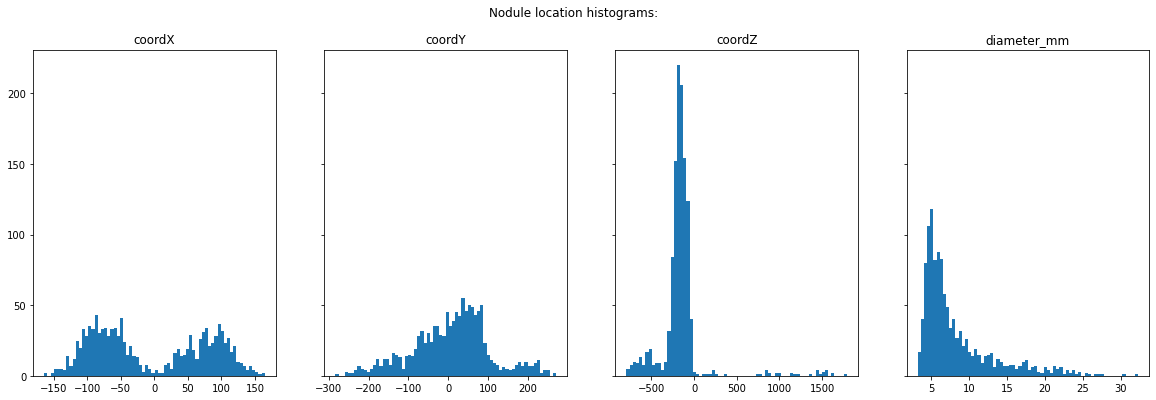

In [20]:
fig, ax = plt.subplots(1, len(cols_of_interest), sharey=True)
fig.suptitle("Nodule location histograms:")
for i, col in enumerate(cols_of_interest):
    ax[i].hist(annotations[col], bins=70)
    ax[i].set_title(col)
plt.show()

Let's try to locate the first nodule!

In [23]:
nodule_meta = annotations.loc[0]
nodule_meta

seriesuid      1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...
coordX                                               -128.699421
coordY                                               -175.319272
coordZ                                               -298.387506
diameter_mm                                             5.651471
Name: 0, dtype: object

In [24]:
nodule_meta.seriesuid

'1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860'

In [30]:
nodule_file = [file for file in all_mhd_files if file.filename == nodule_meta.seriesuid]
print(len(nodule_file))

2


[File(filename='1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860', folder='/home/azureuser/cloudfiles/data/LUNA16/extracted/subset8/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860.mhd', extension='mhd', size=432, path='/home/azureuser/cloudfiles/data/LUNA16/extracted/subset8'),
 File(filename='1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860', folder='/home/azureuser/cloudfiles/data/LUNA16/extracted/seg-lungs-LUNA16/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860.mhd', extension='mhd', size=460, path='/home/azureuser/cloudfiles/data/LUNA16/extracted/seg-lungs-LUNA16')]

In [31]:
nodule_file = nodule_file[0]
nodule_file

File(filename='1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860', folder='/home/azureuser/cloudfiles/data/LUNA16/extracted/subset8/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860.mhd', extension='mhd', size=432, path='/home/azureuser/cloudfiles/data/LUNA16/extracted/subset8')

In [32]:
import SimpleITK as sitk
from LUNA16.utils.analyze_data_distribution import read_mhd_and_metadata
n_array, n_spacing, n_origin = read_mhd_and_metadata(nodule_file)

In [33]:
nodule_meta

seriesuid      1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...
coordX                                               -128.699421
coordY                                               -175.319272
coordZ                                               -298.387506
diameter_mm                                             5.651471
Name: 0, dtype: object

In [34]:
n_origin

(-157.67773, -311.67773, -438.4)

In [35]:
n_spacing

(0.64453125, 0.64453125, 1.7999999523162842)

In [36]:
n_array.shape

(194, 512, 512)